In [ ]:
# PROCESS THE DATA: GET THE COORINATES (FEATURE FOR EACH OF THE LIGANDS)

In [31]:
import pandas as pd

# Step 1: Read the CSV files
sum_both_rev2 = pd.read_csv("SUM_BOTH_rev2.csv")  # Read the first file
#all_6 = pd.read_csv("All_6.csv")  # Read the second file
all_6 = pd.read_csv("Bead_types.csv") 

# Step 2: Extract ligand names from SUM_BOTH_rev2.csv
ligand_names = sum_both_rev2.iloc[:, 0]  # Assuming the first column contains ligand names

# Step 3: Match ligand names and extract coordinates from All_6.csv
# Initialize a list to store the results
matched_data = []

# Iterate through each ligand name in SUM_BOTH_rev2.csv
for name in ligand_names:
    # Check if the name exists in All_6.csv
    match = all_6[all_6.iloc[:, 0] == name]  # Assuming the first column in All_6.csv contains ligand names
    if not match.empty:
        # Extract the coordinates (coord1 to coord6)
        coords = match.iloc[:, 1:4].values.flatten().tolist()  # Assuming columns 2-7 are coord1 to coord6
        matched_data.append([name] + coords)
    else:
        # If no match is found, append the name with None values for coordinates
        matched_data.append([name] + [None] * 3)

# Step 4: Create a DataFrame for the matched data
matched_df = pd.DataFrame(matched_data, columns=["Ligand Name", "coord1", "coord2", "coord3"])

# Step 5: Save the results to a new CSV file (optional)
matched_df.to_csv("Matched_Coordinates.csv", index=False)

# Print the matched data
print(matched_df)

    Ligand Name  coord1  coord2  coord3
0      C1_C1_C1       1       1       1
1      C1_C1_C3       1       1       2
2      C1_C1_Qa       1       1       9
3      C1_C1_Qd       1       1       8
4      C1_C3_C1       1       2       1
..          ...     ...     ...     ...
415    Qd_Qd_C1       8       8       1
416    Qd_Qd_P4       8       8       6
417    Qd_Qd_P5       8       8       7
418    Qd_Qd_Qa       8       8       9
419    Qd_Qd_Qd       8       8       8

[420 rows x 4 columns]


## DATASET: DDG DISTRIBUTION

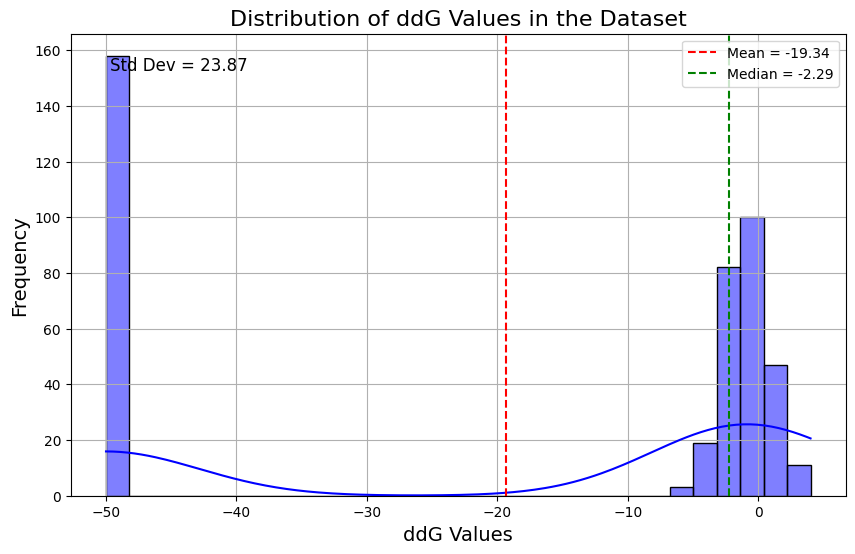

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("final_dataset.csv")  # Replace with your file path

# Step 1: Extract the ddG column
ddG_values = data["ddG"]

# Step 2: Calculate descriptive statistics
mean_ddG = ddG_values.mean()
median_ddG = ddG_values.median()
std_ddG = ddG_values.std()

# Step 3: Plot the distribution of ddG values
plt.figure(figsize=(10, 6))
sns.histplot(ddG_values, kde=True, color="blue", bins=30, edgecolor="black")

# Add vertical lines for mean and median
plt.axvline(mean_ddG, color="red", linestyle="--", label=f"Mean = {mean_ddG:.2f}")
plt.axvline(median_ddG, color="green", linestyle="--", label=f"Median = {median_ddG:.2f}")

# Add title and labels
plt.title("Distribution of ddG Values in the Dataset", fontsize=16)
plt.xlabel("ddG Values", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add legend
plt.legend()

# Add text for standard deviation
plt.text(0.05, 0.95, f"Std Dev = {std_ddG:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment="top")

# Show the plot
plt.grid(True)
plt.show()

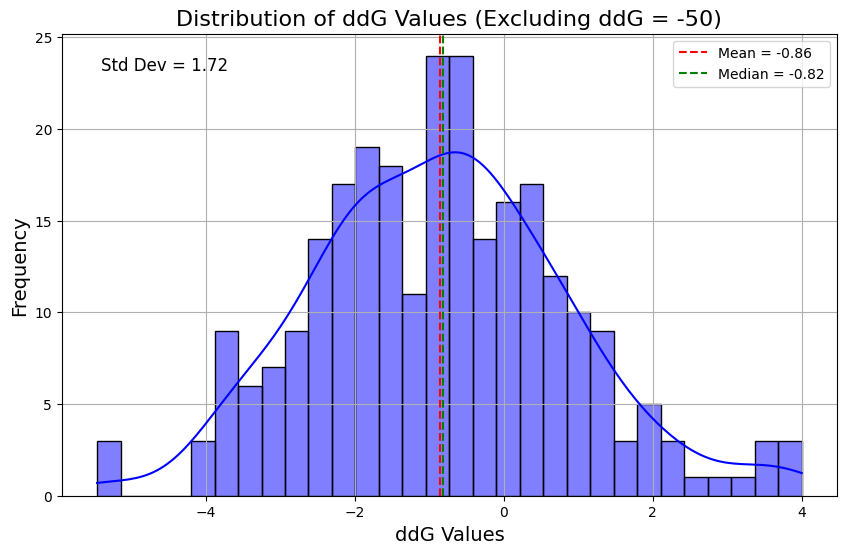

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("final_dataset.csv")  # Replace with your file path

# Step 1: Filter out rows with ddG = -50
filtered_data = data[data["ddG"] != -50]

# Step 2: Extract the ddG column from the filtered dataset
ddG_values = filtered_data["ddG"]

# Step 3: Calculate descriptive statistics
mean_ddG = ddG_values.mean()
median_ddG = ddG_values.median()
std_ddG = ddG_values.std()

# Step 4: Plot the distribution of ddG values
plt.figure(figsize=(10, 6))
sns.histplot(ddG_values, kde=True, color="blue", bins=30, edgecolor="black")

# Add vertical lines for mean and median
plt.axvline(mean_ddG, color="red", linestyle="--", label=f"Mean = {mean_ddG:.2f}")
plt.axvline(median_ddG, color="green", linestyle="--", label=f"Median = {median_ddG:.2f}")

# Add title and labels
plt.title("Distribution of ddG Values (Excluding ddG = -50)", fontsize=16)
plt.xlabel("ddG Values", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add legend
plt.legend()

# Add text for standard deviation
plt.text(0.05, 0.95, f"Std Dev = {std_ddG:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment="top")

# Show the plot
plt.grid(True)
plt.show()

## RANDOM FOREST

In [11]:
# COMPARE WITH RANDOM SELECTION

Iteration 1/36
EI - Cumulative positive ddG values: 12
Uncertainty Sampling - Cumulative positive ddG values: 12
Random Selection - Cumulative positive ddG values: 11
Iteration 2/36
EI - Cumulative positive ddG values: 14
Uncertainty Sampling - Cumulative positive ddG values: 13
Random Selection - Cumulative positive ddG values: 14
Iteration 3/36
EI - Cumulative positive ddG values: 15
Uncertainty Sampling - Cumulative positive ddG values: 13
Random Selection - Cumulative positive ddG values: 15
Iteration 4/36
EI - Cumulative positive ddG values: 21
Uncertainty Sampling - Cumulative positive ddG values: 14
Random Selection - Cumulative positive ddG values: 17
Iteration 5/36
EI - Cumulative positive ddG values: 25
Uncertainty Sampling - Cumulative positive ddG values: 15
Random Selection - Cumulative positive ddG values: 18
Iteration 6/36
EI - Cumulative positive ddG values: 28
Uncertainty Sampling - Cumulative positive ddG values: 20
Random Selection - Cumulative positive ddG values: 2

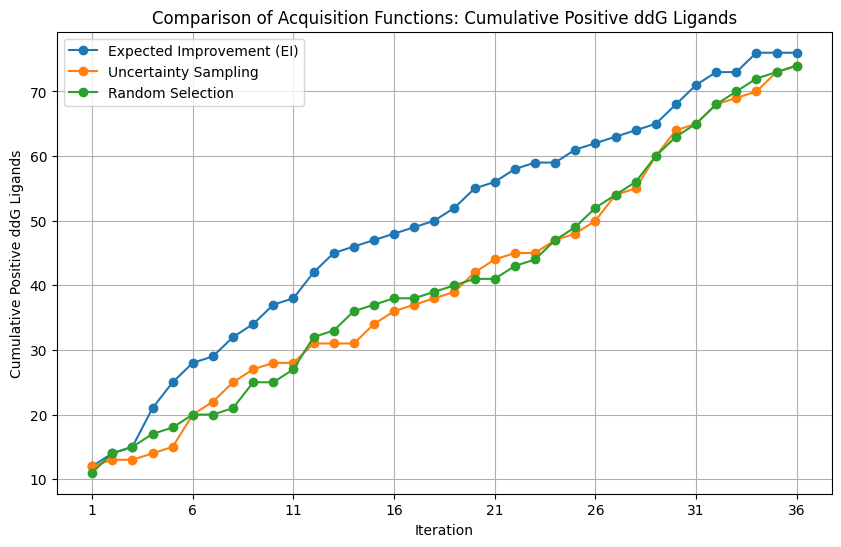

In [45]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("final_dataset.csv")  # Replace with your file path

# Step 1: Initialize the labeled and unlabeled sets
np.random.seed(42)  # For reproducibility
initial_indices = np.random.choice(data.index, size=50, replace=False)  # Randomly select 50 ligands
labeled_data_ei = data.loc[initial_indices].copy()  # Labeled dataset for EI
labeled_data_uncertainty = labeled_data_ei.copy()  # Labeled dataset for uncertainty sampling
labeled_data_random = labeled_data_ei.copy()  # Labeled dataset for random selection
unlabeled_data_ei = data.drop(initial_indices).copy()  # Unlabeled pool for EI
unlabeled_data_uncertainty = unlabeled_data_ei.copy()  # Unlabeled pool for uncertainty sampling
unlabeled_data_random = unlabeled_data_ei.copy()  # Unlabeled pool for random selection

# Step 2: Active learning loop
num_iterations = 36  # Number of iterations
candidates_per_iteration = 10  # Number of candidates to select per iteration

# Track cumulative positive ddG values for all approaches
positive_ddG_counts_ei = []  # For EI
positive_ddG_counts_uncertainty = []  # For uncertainty sampling
positive_ddG_counts_random = []  # For random selection

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")

    # --- Expected Improvement (EI) ---
    # Step 3: Train a regression model on the labeled data
    X_labeled_ei = labeled_data_ei[["coord1", "coord2", "coord3", "coord4", "coord5", "coord6"]]
    y_labeled_ei = labeled_data_ei["ddG"]
    model_ei = RandomForestRegressor(random_state=42)
    model_ei.fit(X_labeled_ei, y_labeled_ei)

    # Step 4: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_ei = unlabeled_data_ei[["coord1", "coord2", "coord3", "coord4", "coord5", "coord6"]]
    y_pred_unlabeled_ei = model_ei.predict(X_unlabeled_ei)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_ei = np.array([tree.predict(X_unlabeled_ei) for tree in model_ei.estimators_])
    y_std_unlabeled_ei = np.std(tree_predictions_ei, axis=0)

    # Step 5: Define the acquisition function (Expected Improvement)
    def expected_improvement(y_pred, y_std, best_y):
        """
        Calculate the Expected Improvement (EI) acquisition function.
        """
        improvement = y_pred - best_y
        z = improvement / (y_std + 1e-9)
        ei = improvement * norm.cdf(z) + y_std * norm.pdf(z)
        return ei

    # Calculate EI for all unlabeled samples
    best_y_ei = y_labeled_ei.max()  # Best observed ddG value so far
    ei_values = expected_improvement(y_pred_unlabeled_ei, y_std_unlabeled_ei, best_y_ei)

    # Step 6: Select the next best candidates (ligands with the highest EI values)
    top_candidate_indices_ei = np.argsort(ei_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_ei = unlabeled_data_ei.iloc[top_candidate_indices_ei].copy()  # Get the top candidates

    # Step 7: Simulate labeling by revealing the true ddG values
    labeled_data_ei = pd.concat([labeled_data_ei, top_candidates_ei])  # Add top candidates to the labeled set
    unlabeled_data_ei = unlabeled_data_ei.drop(top_candidates_ei.index)  # Remove top candidates from the unlabeled pool

    # Step 8: Track the cumulative number of positive ddG values
    positive_ddG_count_ei = (labeled_data_ei["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_ei.append(positive_ddG_count_ei)

    # --- Uncertainty Sampling ---
    # Step 9: Train a regression model on the labeled data
    X_labeled_uncertainty = labeled_data_uncertainty[["coord1", "coord2", "coord3", "coord4", "coord5", "coord6"]]
    y_labeled_uncertainty = labeled_data_uncertainty["ddG"]
    model_uncertainty = RandomForestRegressor(random_state=42)
    model_uncertainty.fit(X_labeled_uncertainty, y_labeled_uncertainty)

    # Step 10: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_uncertainty = unlabeled_data_uncertainty[["coord1", "coord2", "coord3", "coord4", "coord5", "coord6"]]
    y_pred_unlabeled_uncertainty = model_uncertainty.predict(X_unlabeled_uncertainty)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_uncertainty = np.array([tree.predict(X_unlabeled_uncertainty) for tree in model_uncertainty.estimators_])
    y_std_unlabeled_uncertainty = np.std(tree_predictions_uncertainty, axis=0)

    # Step 11: Select the next best candidates (ligands with the highest uncertainty)
    top_candidate_indices_uncertainty = np.argsort(y_std_unlabeled_uncertainty)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_uncertainty = unlabeled_data_uncertainty.iloc[top_candidate_indices_uncertainty].copy()  # Get the top candidates

    # Step 12: Simulate labeling by revealing the true ddG values
    labeled_data_uncertainty = pd.concat([labeled_data_uncertainty, top_candidates_uncertainty])  # Add top candidates to the labeled set
    unlabeled_data_uncertainty = unlabeled_data_uncertainty.drop(top_candidates_uncertainty.index)  # Remove top candidates from the unlabeled pool

    # Step 13: Track the cumulative number of positive ddG values
    positive_ddG_count_uncertainty = (labeled_data_uncertainty["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_uncertainty.append(positive_ddG_count_uncertainty)

    # --- Random Selection ---
    # Step 14: Randomly select candidates from the unlabeled pool
    random_candidate_indices = np.random.choice(unlabeled_data_random.index, size=candidates_per_iteration, replace=False)
    random_candidates = unlabeled_data_random.loc[random_candidate_indices].copy()  # Get the random candidates

    # Step 15: Simulate labeling by revealing the true ddG values
    labeled_data_random = pd.concat([labeled_data_random, random_candidates])  # Add random candidates to the labeled set
    unlabeled_data_random = unlabeled_data_random.drop(random_candidate_indices)  # Remove random candidates from the unlabeled pool

    # Step 16: Track the cumulative number of positive ddG values
    positive_ddG_count_random = (labeled_data_random["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_random.append(positive_ddG_count_random)

    # Print results for the current iteration
    print(f"EI - Cumulative positive ddG values: {positive_ddG_count_ei}")
    print(f"Uncertainty Sampling - Cumulative positive ddG values: {positive_ddG_count_uncertainty}")
    print(f"Random Selection - Cumulative positive ddG values: {positive_ddG_count_random}")

# Step 17: Plot the cumulative positive ddG values over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_ei, marker="o", label="Expected Improvement (EI)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_uncertainty, marker="o", label="Uncertainty Sampling")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_random, marker="o", label="Random Selection")

# Set x-ticks to show values at every two steps
plt.xticks(range(1, num_iterations + 1, 5))  # Show x-ticks at every two steps

plt.xlabel("Iteration")
plt.ylabel("Cumulative Positive ddG Ligands")
plt.title("Comparison of Acquisition Functions: Cumulative Positive ddG Ligands")
plt.legend()
plt.grid()
plt.show()

In [ ]:
### Average ddG of positive ligands  - recheck

Iteration 1/36
EI - Cumulative positive ddG values: 12
Uncertainty Sampling - Cumulative positive ddG values: 12
Random Selection - Cumulative positive ddG values: 11
EI - Average ddG of positive ligands: 0.6770
Uncertainty Sampling - Average ddG of positive ligands: 0.6387
Random Selection - Average ddG of positive ligands: 0.6899
Iteration 2/36
EI - Cumulative positive ddG values: 14
Uncertainty Sampling - Cumulative positive ddG values: 13
Random Selection - Cumulative positive ddG values: 14
EI - Average ddG of positive ligands: 0.6520
Uncertainty Sampling - Average ddG of positive ligands: 0.7017
Random Selection - Average ddG of positive ligands: 0.6583
Iteration 3/36
EI - Cumulative positive ddG values: 15
Uncertainty Sampling - Cumulative positive ddG values: 13
Random Selection - Cumulative positive ddG values: 15
EI - Average ddG of positive ligands: 0.7615
Uncertainty Sampling - Average ddG of positive ligands: 0.7017
Random Selection - Average ddG of positive ligands: 0.650

EI - Cumulative positive ddG values: 62
Uncertainty Sampling - Cumulative positive ddG values: 50
Random Selection - Cumulative positive ddG values: 52
EI - Average ddG of positive ligands: 1.1299
Uncertainty Sampling - Average ddG of positive ligands: 1.2650
Random Selection - Average ddG of positive ligands: 1.1119
Iteration 27/36
EI - Cumulative positive ddG values: 63
Uncertainty Sampling - Cumulative positive ddG values: 54
Random Selection - Cumulative positive ddG values: 54
EI - Average ddG of positive ligands: 1.1158
Uncertainty Sampling - Average ddG of positive ligands: 1.2787
Random Selection - Average ddG of positive ligands: 1.1199
Iteration 28/36
EI - Cumulative positive ddG values: 64
Uncertainty Sampling - Cumulative positive ddG values: 55
Random Selection - Cumulative positive ddG values: 56
EI - Average ddG of positive ligands: 1.1104
Uncertainty Sampling - Average ddG of positive ligands: 1.2625
Random Selection - Average ddG of positive ligands: 1.1080
Iteration 2

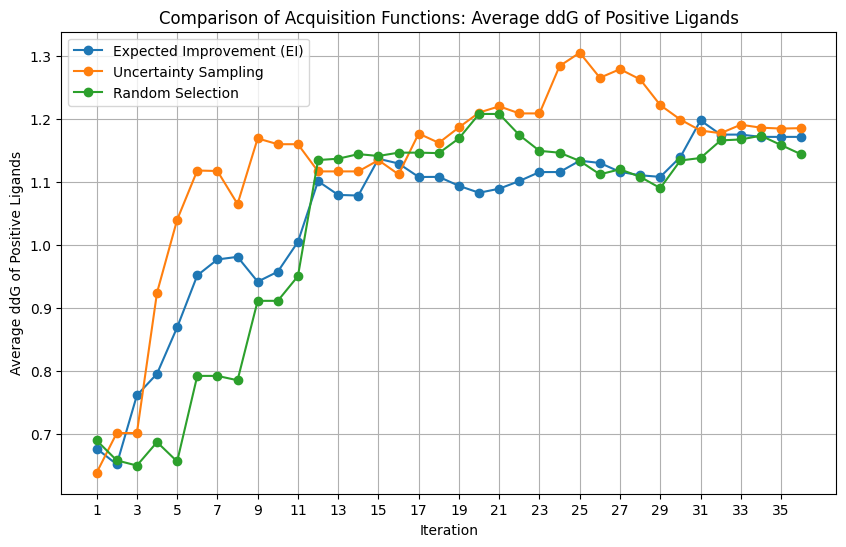

In [46]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("final_dataset.csv")  # Replace with your file path

# Step 1: Initialize the labeled and unlabeled sets
np.random.seed(42)  # For reproducibility
initial_indices = np.random.choice(data.index, size=50, replace=False)  # Randomly select 50 ligands
labeled_data_ei = data.loc[initial_indices].copy()  # Labeled dataset for EI
labeled_data_uncertainty = labeled_data_ei.copy()  # Labeled dataset for uncertainty sampling
labeled_data_random = labeled_data_ei.copy()  # Labeled dataset for random selection
unlabeled_data_ei = data.drop(initial_indices).copy()  # Unlabeled pool for EI
unlabeled_data_uncertainty = unlabeled_data_ei.copy()  # Unlabeled pool for uncertainty sampling
unlabeled_data_random = unlabeled_data_ei.copy()  # Unlabeled pool for random selection

# Step 2: Active learning loop
num_iterations = 36  # Number of iterations
candidates_per_iteration = 10  # Number of candidates to select per iteration

# Track cumulative positive ddG values for all approaches
positive_ddG_counts_ei = []  # For EI
positive_ddG_counts_uncertainty = []  # For uncertainty sampling
positive_ddG_counts_random = []  # For random selection

# Track average ddG values of positive ligands for all approaches
average_ddG_ei = []  # For EI
average_ddG_uncertainty = []  # For uncertainty sampling
average_ddG_random = []  # For random selection

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")

    # --- Expected Improvement (EI) ---
    # Step 3: Train a regression model on the labeled data
    X_labeled_ei = labeled_data_ei[["coord1", "coord2", "coord3", "coord4", "coord5", "coord6"]]
    y_labeled_ei = labeled_data_ei["ddG"]
    model_ei = RandomForestRegressor(random_state=42)
    model_ei.fit(X_labeled_ei, y_labeled_ei)

    # Step 4: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_ei = unlabeled_data_ei[["coord1", "coord2", "coord3", "coord4", "coord5", "coord6"]]
    y_pred_unlabeled_ei = model_ei.predict(X_unlabeled_ei)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_ei = np.array([tree.predict(X_unlabeled_ei) for tree in model_ei.estimators_])
    y_std_unlabeled_ei = np.std(tree_predictions_ei, axis=0)

    # Step 5: Define the acquisition function (Expected Improvement)
    def expected_improvement(y_pred, y_std, best_y):
        """
        Calculate the Expected Improvement (EI) acquisition function.
        """
        improvement = y_pred - best_y
        z = improvement / (y_std + 1e-9)
        ei = improvement * norm.cdf(z) + y_std * norm.pdf(z)
        return ei

    # Calculate EI for all unlabeled samples
    best_y_ei = y_labeled_ei.max()  # Best observed ddG value so far
    ei_values = expected_improvement(y_pred_unlabeled_ei, y_std_unlabeled_ei, best_y_ei)

    # Step 6: Select the next best candidates (ligands with the highest EI values)
    top_candidate_indices_ei = np.argsort(ei_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_ei = unlabeled_data_ei.iloc[top_candidate_indices_ei].copy()  # Get the top candidates

    # Step 7: Simulate labeling by revealing the true ddG values
    labeled_data_ei = pd.concat([labeled_data_ei, top_candidates_ei])  # Add top candidates to the labeled set
    unlabeled_data_ei = unlabeled_data_ei.drop(top_candidates_ei.index)  # Remove top candidates from the unlabeled pool

    # Step 8: Track the cumulative number of positive ddG values
    positive_ddG_count_ei = (labeled_data_ei["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_ei.append(positive_ddG_count_ei)

    # Step 9: Track the average ddG value of positive ligands
    positive_ddG_values_ei = labeled_data_ei[labeled_data_ei["ddG"] > 0]["ddG"]
    average_ddG_ei.append(positive_ddG_values_ei.mean())

    # --- Uncertainty Sampling ---
    # Step 10: Train a regression model on the labeled data
    X_labeled_uncertainty = labeled_data_uncertainty[["coord1", "coord2", "coord3", "coord4", "coord5", "coord6"]]
    y_labeled_uncertainty = labeled_data_uncertainty["ddG"]
    model_uncertainty = RandomForestRegressor(random_state=42)
    model_uncertainty.fit(X_labeled_uncertainty, y_labeled_uncertainty)

    # Step 11: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_uncertainty = unlabeled_data_uncertainty[["coord1", "coord2", "coord3", "coord4", "coord5", "coord6"]]
    y_pred_unlabeled_uncertainty = model_uncertainty.predict(X_unlabeled_uncertainty)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_uncertainty = np.array([tree.predict(X_unlabeled_uncertainty) for tree in model_uncertainty.estimators_])
    y_std_unlabeled_uncertainty = np.std(tree_predictions_uncertainty, axis=0)

    # Step 12: Select the next best candidates (ligands with the highest uncertainty)
    top_candidate_indices_uncertainty = np.argsort(y_std_unlabeled_uncertainty)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_uncertainty = unlabeled_data_uncertainty.iloc[top_candidate_indices_uncertainty].copy()  # Get the top candidates

    # Step 13: Simulate labeling by revealing the true ddG values
    labeled_data_uncertainty = pd.concat([labeled_data_uncertainty, top_candidates_uncertainty])  # Add top candidates to the labeled set
    unlabeled_data_uncertainty = unlabeled_data_uncertainty.drop(top_candidates_uncertainty.index)  # Remove top candidates from the unlabeled pool

    # Step 14: Track the cumulative number of positive ddG values
    positive_ddG_count_uncertainty = (labeled_data_uncertainty["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_uncertainty.append(positive_ddG_count_uncertainty)

    # Step 15: Track the average ddG value of positive ligands
    positive_ddG_values_uncertainty = labeled_data_uncertainty[labeled_data_uncertainty["ddG"] > 0]["ddG"]
    average_ddG_uncertainty.append(positive_ddG_values_uncertainty.mean())

    # --- Random Selection ---
    # Step 16: Randomly select candidates from the unlabeled pool
    random_candidate_indices = np.random.choice(unlabeled_data_random.index, size=candidates_per_iteration, replace=False)
    random_candidates = unlabeled_data_random.loc[random_candidate_indices].copy()  # Get the random candidates

    # Step 17: Simulate labeling by revealing the true ddG values
    labeled_data_random = pd.concat([labeled_data_random, random_candidates])  # Add random candidates to the labeled set
    unlabeled_data_random = unlabeled_data_random.drop(random_candidate_indices)  # Remove random candidates from the unlabeled pool

    # Step 18: Track the cumulative number of positive ddG values
    positive_ddG_count_random = (labeled_data_random["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_random.append(positive_ddG_count_random)

    # Step 19: Track the average ddG value of positive ligands
    positive_ddG_values_random = labeled_data_random[labeled_data_random["ddG"] > 0]["ddG"]
    average_ddG_random.append(positive_ddG_values_random.mean())

    # Print results for the current iteration
    print(f"EI - Cumulative positive ddG values: {positive_ddG_count_ei}")
    print(f"Uncertainty Sampling - Cumulative positive ddG values: {positive_ddG_count_uncertainty}")
    print(f"Random Selection - Cumulative positive ddG values: {positive_ddG_count_random}")
    print(f"EI - Average ddG of positive ligands: {average_ddG_ei[-1]:.4f}")
    print(f"Uncertainty Sampling - Average ddG of positive ligands: {average_ddG_uncertainty[-1]:.4f}")
    print(f"Random Selection - Average ddG of positive ligands: {average_ddG_random[-1]:.4f}")

# Step 20: Plot the average ddG values over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), average_ddG_ei, marker="o", label="Expected Improvement (EI)")
plt.plot(range(1, num_iterations + 1), average_ddG_uncertainty, marker="o", label="Uncertainty Sampling")
plt.plot(range(1, num_iterations + 1), average_ddG_random, marker="o", label="Random Selection")

# Set x-ticks to show values at every two steps
plt.xticks(range(1, num_iterations + 1, 2))  # Show x-ticks at every two steps

plt.xlabel("Iteration")
plt.ylabel("Average ddG of Positive Ligands")
plt.title("Comparison of Acquisition Functions: Average ddG of Positive Ligands")
plt.legend()
plt.grid()
plt.show()

In [ ]:
## CHECK FEATURE AS BEAD TYPE (THREE COORDINATES)

Iteration 1/10
EI - Cumulative positive ddG values: 14
Uncertainty Sampling - Cumulative positive ddG values: 13
Random Selection - Cumulative positive ddG values: 11
Iteration 2/10
EI - Cumulative positive ddG values: 17
Uncertainty Sampling - Cumulative positive ddG values: 14
Random Selection - Cumulative positive ddG values: 14
Iteration 3/10
EI - Cumulative positive ddG values: 18
Uncertainty Sampling - Cumulative positive ddG values: 16
Random Selection - Cumulative positive ddG values: 15
Iteration 4/10
EI - Cumulative positive ddG values: 22
Uncertainty Sampling - Cumulative positive ddG values: 16
Random Selection - Cumulative positive ddG values: 17
Iteration 5/10
EI - Cumulative positive ddG values: 25
Uncertainty Sampling - Cumulative positive ddG values: 16
Random Selection - Cumulative positive ddG values: 18
Iteration 6/10
EI - Cumulative positive ddG values: 28
Uncertainty Sampling - Cumulative positive ddG values: 17
Random Selection - Cumulative positive ddG values: 2

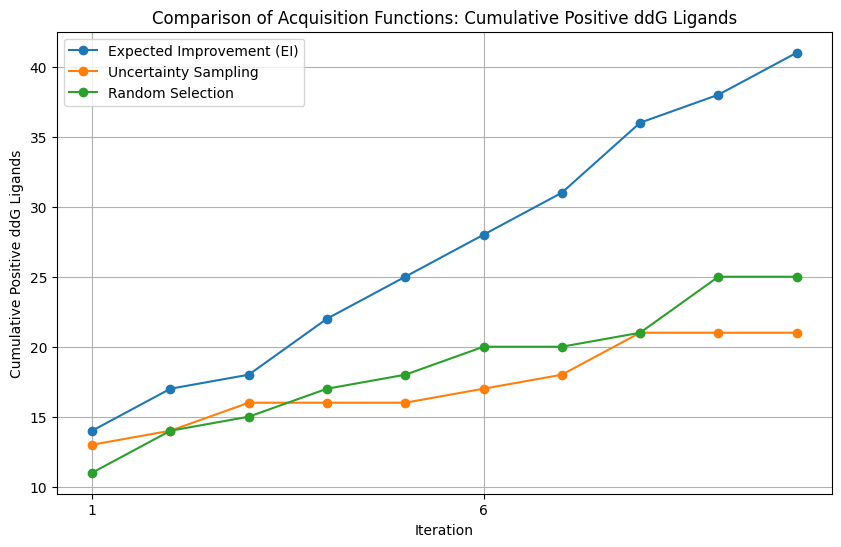

In [38]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("final_dataset_BeadType.csv")  # Replace with your file path

# Step 1: Initialize the labeled and unlabeled sets
np.random.seed(42)  # For reproducibility
initial_indices = np.random.choice(data.index, size=50, replace=False)  # Randomly select 50 ligands
labeled_data_ei = data.loc[initial_indices].copy()  # Labeled dataset for EI
labeled_data_uncertainty = labeled_data_ei.copy()  # Labeled dataset for uncertainty sampling
labeled_data_random = labeled_data_ei.copy()  # Labeled dataset for random selection
unlabeled_data_ei = data.drop(initial_indices).copy()  # Unlabeled pool for EI
unlabeled_data_uncertainty = unlabeled_data_ei.copy()  # Unlabeled pool for uncertainty sampling
unlabeled_data_random = unlabeled_data_ei.copy()  # Unlabeled pool for random selection

# Step 2: Active learning loop
num_iterations = 10  # Number of iterations
candidates_per_iteration = 10  # Number of candidates to select per iteration

# Track cumulative positive ddG values for all approaches
positive_ddG_counts_ei = []  # For EI
positive_ddG_counts_uncertainty = []  # For uncertainty sampling
positive_ddG_counts_random = []  # For random selection

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")

    # --- Expected Improvement (EI) ---
    # Step 3: Train a regression model on the labeled data
    X_labeled_ei = labeled_data_ei[["coord1", "coord2", "coord3"]]
    y_labeled_ei = labeled_data_ei["ddG"]
    model_ei = RandomForestRegressor(random_state=42)
    model_ei.fit(X_labeled_ei, y_labeled_ei)

    # Step 4: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_ei = unlabeled_data_ei[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_ei = model_ei.predict(X_unlabeled_ei)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_ei = np.array([tree.predict(X_unlabeled_ei) for tree in model_ei.estimators_])
    y_std_unlabeled_ei = np.std(tree_predictions_ei, axis=0)

    # Step 5: Define the acquisition function (Expected Improvement)
    def expected_improvement(y_pred, y_std, best_y):
        """
        Calculate the Expected Improvement (EI) acquisition function.
        """
        improvement = y_pred - best_y
        z = improvement / (y_std + 1e-9)
        ei = improvement * norm.cdf(z) + y_std * norm.pdf(z)
        return ei

    # Calculate EI for all unlabeled samples
    best_y_ei = y_labeled_ei.max()  # Best observed ddG value so far
    ei_values = expected_improvement(y_pred_unlabeled_ei, y_std_unlabeled_ei, best_y_ei)

    # Step 6: Select the next best candidates (ligands with the highest EI values)
    top_candidate_indices_ei = np.argsort(ei_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_ei = unlabeled_data_ei.iloc[top_candidate_indices_ei].copy()  # Get the top candidates

    # Step 7: Simulate labeling by revealing the true ddG values
    labeled_data_ei = pd.concat([labeled_data_ei, top_candidates_ei])  # Add top candidates to the labeled set
    unlabeled_data_ei = unlabeled_data_ei.drop(top_candidates_ei.index)  # Remove top candidates from the unlabeled pool

    # Step 8: Track the cumulative number of positive ddG values
    positive_ddG_count_ei = (labeled_data_ei["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_ei.append(positive_ddG_count_ei)

    # --- Uncertainty Sampling ---
    # Step 9: Train a regression model on the labeled data
    X_labeled_uncertainty = labeled_data_uncertainty[["coord1", "coord2", "coord3"]]
    y_labeled_uncertainty = labeled_data_uncertainty["ddG"]
    model_uncertainty = RandomForestRegressor(random_state=42)
    model_uncertainty.fit(X_labeled_uncertainty, y_labeled_uncertainty)

    # Step 10: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_uncertainty = unlabeled_data_uncertainty[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_uncertainty = model_uncertainty.predict(X_unlabeled_uncertainty)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_uncertainty = np.array([tree.predict(X_unlabeled_uncertainty) for tree in model_uncertainty.estimators_])
    y_std_unlabeled_uncertainty = np.std(tree_predictions_uncertainty, axis=0)

    # Step 11: Select the next best candidates (ligands with the highest uncertainty)
    top_candidate_indices_uncertainty = np.argsort(y_std_unlabeled_uncertainty)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_uncertainty = unlabeled_data_uncertainty.iloc[top_candidate_indices_uncertainty].copy()  # Get the top candidates

    # Step 12: Simulate labeling by revealing the true ddG values
    labeled_data_uncertainty = pd.concat([labeled_data_uncertainty, top_candidates_uncertainty])  # Add top candidates to the labeled set
    unlabeled_data_uncertainty = unlabeled_data_uncertainty.drop(top_candidates_uncertainty.index)  # Remove top candidates from the unlabeled pool

    # Step 13: Track the cumulative number of positive ddG values
    positive_ddG_count_uncertainty = (labeled_data_uncertainty["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_uncertainty.append(positive_ddG_count_uncertainty)

    # --- Random Selection ---
    # Step 14: Randomly select candidates from the unlabeled pool
    random_candidate_indices = np.random.choice(unlabeled_data_random.index, size=candidates_per_iteration, replace=False)
    random_candidates = unlabeled_data_random.loc[random_candidate_indices].copy()  # Get the random candidates

    # Step 15: Simulate labeling by revealing the true ddG values
    labeled_data_random = pd.concat([labeled_data_random, random_candidates])  # Add random candidates to the labeled set
    unlabeled_data_random = unlabeled_data_random.drop(random_candidate_indices)  # Remove random candidates from the unlabeled pool

    # Step 16: Track the cumulative number of positive ddG values
    positive_ddG_count_random = (labeled_data_random["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_random.append(positive_ddG_count_random)

    # Print results for the current iteration
    print(f"EI - Cumulative positive ddG values: {positive_ddG_count_ei}")
    print(f"Uncertainty Sampling - Cumulative positive ddG values: {positive_ddG_count_uncertainty}")
    print(f"Random Selection - Cumulative positive ddG values: {positive_ddG_count_random}")

# Step 17: Plot the cumulative positive ddG values over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_ei, marker="o", label="Expected Improvement (EI)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_uncertainty, marker="o", label="Uncertainty Sampling")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_random, marker="o", label="Random Selection")

# Set x-ticks to show values at every two steps
plt.xticks(range(1, num_iterations + 1, 5))  # Show x-ticks at every two steps

plt.xlabel("Iteration")
plt.ylabel("Cumulative Positive ddG Ligands")
plt.title("Comparison of Acquisition Functions: Cumulative Positive ddG Ligands")
plt.legend()
plt.grid()
plt.show()

Iteration 1/36
EI - Cumulative positive ddG values: 12
Uncertainty Sampling - Cumulative positive ddG values: 13
Random Selection - Cumulative positive ddG values: 11
EI - Average ddG of positive ligands: 0.6696
Uncertainty Sampling - Average ddG of positive ligands: 0.7204
Random Selection - Average ddG of positive ligands: 0.6899
Iteration 2/36
EI - Cumulative positive ddG values: 13
Uncertainty Sampling - Cumulative positive ddG values: 15
Random Selection - Cumulative positive ddG values: 14
EI - Average ddG of positive ligands: 0.8684
Uncertainty Sampling - Average ddG of positive ligands: 0.7111
Random Selection - Average ddG of positive ligands: 0.6583
Iteration 3/36
EI - Cumulative positive ddG values: 14
Uncertainty Sampling - Cumulative positive ddG values: 15
Random Selection - Cumulative positive ddG values: 15
EI - Average ddG of positive ligands: 0.8573
Uncertainty Sampling - Average ddG of positive ligands: 0.7111
Random Selection - Average ddG of positive ligands: 0.650

EI - Cumulative positive ddG values: 62
Uncertainty Sampling - Cumulative positive ddG values: 56
Random Selection - Cumulative positive ddG values: 52
EI - Average ddG of positive ligands: 1.1733
Uncertainty Sampling - Average ddG of positive ligands: 1.1787
Random Selection - Average ddG of positive ligands: 1.1119
Iteration 27/36
EI - Cumulative positive ddG values: 62
Uncertainty Sampling - Cumulative positive ddG values: 58
Random Selection - Cumulative positive ddG values: 54
EI - Average ddG of positive ligands: 1.1733
Uncertainty Sampling - Average ddG of positive ligands: 1.1838
Random Selection - Average ddG of positive ligands: 1.1199
Iteration 28/36
EI - Cumulative positive ddG values: 63
Uncertainty Sampling - Cumulative positive ddG values: 60
Random Selection - Cumulative positive ddG values: 56
EI - Average ddG of positive ligands: 1.1619
Uncertainty Sampling - Average ddG of positive ligands: 1.2212
Random Selection - Average ddG of positive ligands: 1.1080
Iteration 2

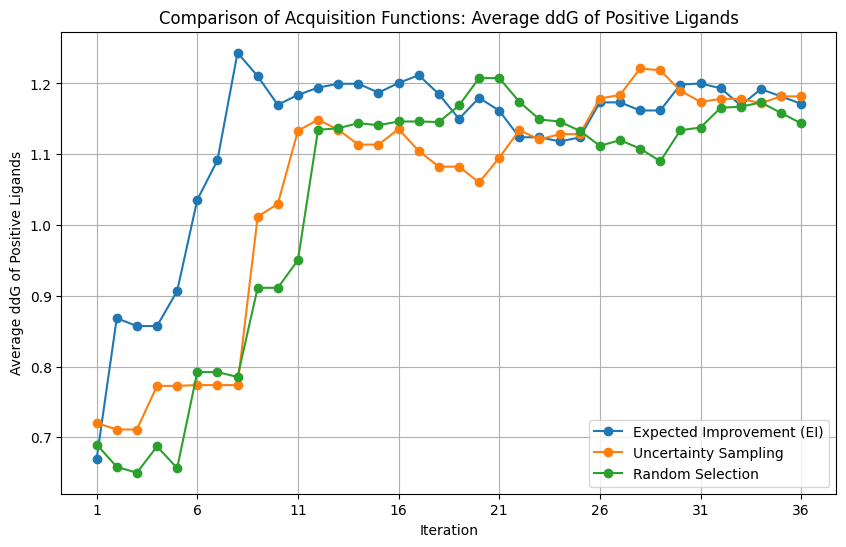

In [43]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("final_dataset.csv")  # Replace with your file path

# Step 1: Initialize the labeled and unlabeled sets
np.random.seed(42)  # For reproducibility
initial_indices = np.random.choice(data.index, size=50, replace=False)  # Randomly select 50 ligands
labeled_data_ei = data.loc[initial_indices].copy()  # Labeled dataset for EI
labeled_data_uncertainty = labeled_data_ei.copy()  # Labeled dataset for uncertainty sampling
labeled_data_random = labeled_data_ei.copy()  # Labeled dataset for random selection
unlabeled_data_ei = data.drop(initial_indices).copy()  # Unlabeled pool for EI
unlabeled_data_uncertainty = unlabeled_data_ei.copy()  # Unlabeled pool for uncertainty sampling
unlabeled_data_random = unlabeled_data_ei.copy()  # Unlabeled pool for random selection

# Step 2: Active learning loop
num_iterations = 36  # Number of iterations
candidates_per_iteration = 10  # Number of candidates to select per iteration

# Track cumulative positive ddG values for all approaches
positive_ddG_counts_ei = []  # For EI
positive_ddG_counts_uncertainty = []  # For uncertainty sampling
positive_ddG_counts_random = []  # For random selection

# Track average ddG values of positive ligands for all approaches
average_ddG_ei = []  # For EI
average_ddG_uncertainty = []  # For uncertainty sampling
average_ddG_random = []  # For random selection

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")

    # --- Expected Improvement (EI) ---
    # Step 3: Train a regression model on the labeled data
    X_labeled_ei = labeled_data_ei[["coord1", "coord2", "coord3"]]
    y_labeled_ei = labeled_data_ei["ddG"]
    model_ei = RandomForestRegressor(random_state=42)
    model_ei.fit(X_labeled_ei, y_labeled_ei)

    # Step 4: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_ei = unlabeled_data_ei[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_ei = model_ei.predict(X_unlabeled_ei)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_ei = np.array([tree.predict(X_unlabeled_ei) for tree in model_ei.estimators_])
    y_std_unlabeled_ei = np.std(tree_predictions_ei, axis=0)

    # Step 5: Define the acquisition function (Expected Improvement)
    def expected_improvement(y_pred, y_std, best_y):
        """
        Calculate the Expected Improvement (EI) acquisition function.
        """
        improvement = y_pred - best_y
        z = improvement / (y_std + 1e-9)
        ei = improvement * norm.cdf(z) + y_std * norm.pdf(z)
        return ei

    # Calculate EI for all unlabeled samples
    best_y_ei = y_labeled_ei.max()  # Best observed ddG value so far
    ei_values = expected_improvement(y_pred_unlabeled_ei, y_std_unlabeled_ei, best_y_ei)

    # Step 6: Select the next best candidates (ligands with the highest EI values)
    top_candidate_indices_ei = np.argsort(ei_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_ei = unlabeled_data_ei.iloc[top_candidate_indices_ei].copy()  # Get the top candidates

    # Step 7: Simulate labeling by revealing the true ddG values
    labeled_data_ei = pd.concat([labeled_data_ei, top_candidates_ei])  # Add top candidates to the labeled set
    unlabeled_data_ei = unlabeled_data_ei.drop(top_candidates_ei.index)  # Remove top candidates from the unlabeled pool

    # Step 8: Track the cumulative number of positive ddG values
    positive_ddG_count_ei = (labeled_data_ei["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_ei.append(positive_ddG_count_ei)

    # Step 9: Track the average ddG value of positive ligands
    positive_ddG_values_ei = labeled_data_ei[labeled_data_ei["ddG"] > 0]["ddG"]
    average_ddG_ei.append(positive_ddG_values_ei.mean())

    # --- Uncertainty Sampling ---
    # Step 10: Train a regression model on the labeled data
    X_labeled_uncertainty = labeled_data_uncertainty[["coord1", "coord2", "coord3"]]
    y_labeled_uncertainty = labeled_data_uncertainty["ddG"]
    model_uncertainty = RandomForestRegressor(random_state=42)
    model_uncertainty.fit(X_labeled_uncertainty, y_labeled_uncertainty)

    # Step 11: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_uncertainty = unlabeled_data_uncertainty[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_uncertainty = model_uncertainty.predict(X_unlabeled_uncertainty)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_uncertainty = np.array([tree.predict(X_unlabeled_uncertainty) for tree in model_uncertainty.estimators_])
    y_std_unlabeled_uncertainty = np.std(tree_predictions_uncertainty, axis=0)

    # Step 12: Select the next best candidates (ligands with the highest uncertainty)
    top_candidate_indices_uncertainty = np.argsort(y_std_unlabeled_uncertainty)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_uncertainty = unlabeled_data_uncertainty.iloc[top_candidate_indices_uncertainty].copy()  # Get the top candidates

    # Step 13: Simulate labeling by revealing the true ddG values
    labeled_data_uncertainty = pd.concat([labeled_data_uncertainty, top_candidates_uncertainty])  # Add top candidates to the labeled set
    unlabeled_data_uncertainty = unlabeled_data_uncertainty.drop(top_candidates_uncertainty.index)  # Remove top candidates from the unlabeled pool

    # Step 14: Track the cumulative number of positive ddG values
    positive_ddG_count_uncertainty = (labeled_data_uncertainty["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_uncertainty.append(positive_ddG_count_uncertainty)

    # Step 15: Track the average ddG value of positive ligands
    positive_ddG_values_uncertainty = labeled_data_uncertainty[labeled_data_uncertainty["ddG"] > 0]["ddG"]
    average_ddG_uncertainty.append(positive_ddG_values_uncertainty.mean())

    # --- Random Selection ---
    # Step 16: Randomly select candidates from the unlabeled pool
    random_candidate_indices = np.random.choice(unlabeled_data_random.index, size=candidates_per_iteration, replace=False)
    random_candidates = unlabeled_data_random.loc[random_candidate_indices].copy()  # Get the random candidates

    # Step 17: Simulate labeling by revealing the true ddG values
    labeled_data_random = pd.concat([labeled_data_random, random_candidates])  # Add random candidates to the labeled set
    unlabeled_data_random = unlabeled_data_random.drop(random_candidate_indices)  # Remove random candidates from the unlabeled pool

    # Step 18: Track the cumulative number of positive ddG values
    positive_ddG_count_random = (labeled_data_random["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_random.append(positive_ddG_count_random)

    # Step 19: Track the average ddG value of positive ligands
    positive_ddG_values_random = labeled_data_random[labeled_data_random["ddG"] > 0]["ddG"]
    average_ddG_random.append(positive_ddG_values_random.mean())

    # Print results for the current iteration
    print(f"EI - Cumulative positive ddG values: {positive_ddG_count_ei}")
    print(f"Uncertainty Sampling - Cumulative positive ddG values: {positive_ddG_count_uncertainty}")
    print(f"Random Selection - Cumulative positive ddG values: {positive_ddG_count_random}")
    print(f"EI - Average ddG of positive ligands: {average_ddG_ei[-1]:.4f}")
    print(f"Uncertainty Sampling - Average ddG of positive ligands: {average_ddG_uncertainty[-1]:.4f}")
    print(f"Random Selection - Average ddG of positive ligands: {average_ddG_random[-1]:.4f}")

# Step 20: Plot the average ddG values over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), average_ddG_ei, marker="o", label="Expected Improvement (EI)")
plt.plot(range(1, num_iterations + 1), average_ddG_uncertainty, marker="o", label="Uncertainty Sampling")
plt.plot(range(1, num_iterations + 1), average_ddG_random, marker="o", label="Random Selection")

# Set x-ticks to show values at every two steps
plt.xticks(range(1, num_iterations + 1, 5))  # Show x-ticks at every two steps

plt.xlabel("Iteration")
plt.ylabel("Average ddG of Positive Ligands")
plt.title("Comparison of Acquisition Functions: Average ddG of Positive Ligands")
plt.legend()
plt.grid()
plt.show()

In [8]:
import numpy as np
import pandas as pd
from scipy.stats.qmc import LatinHypercube

# Load your dataset
data = pd.read_csv("final_dataset_BeadType.csv")  # Replace with your file path

# Step 1: Initialize the labeled and unlabeled sets
np.random.seed(42)  # For reproducibility

# Use Latin Hypercube Sampling to select 50 indices
lhs = LatinHypercube(d=1)  # 1D sampling
sample = lhs.random(n=50)  # Generate 50 samples

# Scale the samples to the range of indices (0 to 419 for 420 ligands)
initial_indices = (sample * len(data)).astype(int).flatten()

print("Selected indices:", initial_indices)

Selected indices: [370 339 311 409 238  44  14 133  58 309 187 282 400 299 196  86 206 264
  39 412 117  76 219 346 214  25 235 162 293   0 145 174 334 179 122 158
 381  99 355 269 138  70 245 393  19 321 103 365  65 258]


## INITIAL DATA SELECTION: Random vs Latin hypercube sampling (LHS)

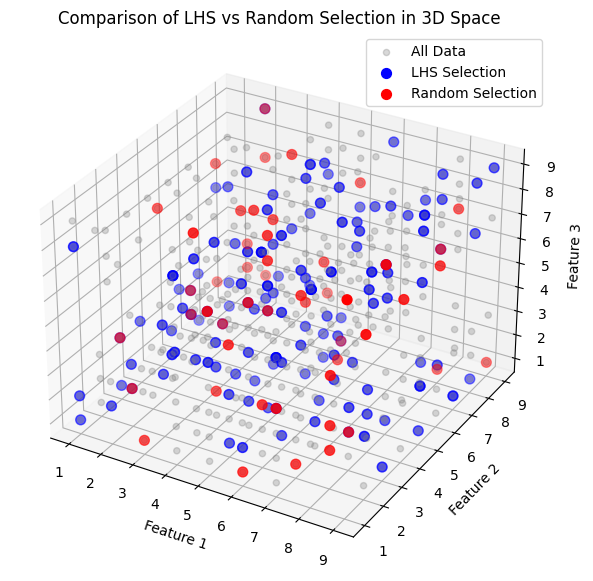

LHS Selected indices: [ 66  39  84 294 122  55 136 385   0 251 139 184  77  26 289 166 407 407
 231 372 220 418 261 334 107  90 135 147 278 161  49 133 272 171   3  26
   1  48 232 263 161 168 269 314 312 236 360 205 156  67 240  40 226 118
 193  55  65 180 402  17 287 319 192  22 392 342 212 328 295   8   9 402
 285  98 419 321 195 375 346  73 388 376 295 279  56 236  12 209 227 215
 129  82 382  93 274 324 383 343 349 110 416 193 357  20 107  69 188 143
 339 250 309 303 114 265 226 349 361 365 310  34  32 158  48 403 365 152
 257 182  69 331 173 254 314 214 126 402 104  77 187 255 117 391 207 250
 120 287  93  86 147 356]
Random Selected indices: [145 334 175 369 416  73 132 137  30  72  70  94 368  90 326 412   9 247
 196 231 192 239 347 228  55 353  56 297 271  79 329 116 208 194 337 184
 218  39 168 262  75  76 415  33 113 375 148 294 367  15]


In [21]:
!pip install pyDOE2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25553 sha256=9b3c34c1eac821abed432149fe12014f030b556ee27f4bf03fab0a99823582c4
  Stored in directory: c:\users\dtnguyen28\appdata\local\pip\cache\wheels\74\df\57\46177ad360bf3192af8ae02bc15f10740cd882bc60726cafb1
Successfully built pyDOE2


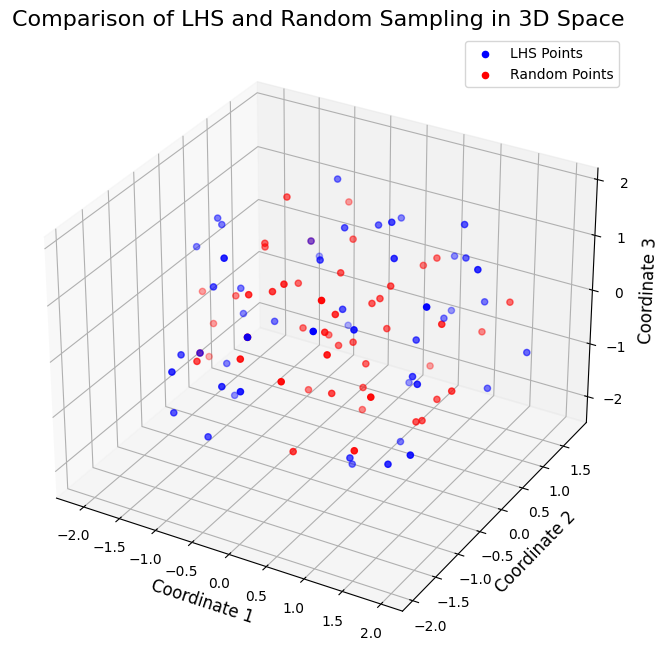

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyDOE2 import lhs  # Import the LHS function
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Load your dataset
data = pd.read_csv("final_dataset.csv")  # Replace with your file path

# Extract the three coordinates (columns 2, 3, and 4)
coordinates = data.iloc[:, 1:4].values  # Columns 2, 3, and 4 (0-based indexing)

# Step 1: Select 50 LHS points
np.random.seed(42)  # For reproducibility
n_samples = 50

# Generate 50 LHS samples in 3D space (normalized to [0, 1])
lhs_samples = lhs(3, samples=n_samples, criterion="maximin")  # 3 dimensions, 50 samples

# Scale the LHS samples to the range of the actual coordinates
min_coords = coordinates.min(axis=0)
max_coords = coordinates.max(axis=0)
scaled_lhs_samples = min_coords + lhs_samples * (max_coords - min_coords)

# Find the closest points in the dataset to the LHS samples
distances = cdist(scaled_lhs_samples, coordinates)
initial_indices_lhs = np.argmin(distances, axis=1)

# Ensure unique indices (in case multiple LHS samples map to the same closest point)
initial_indices_lhs = np.unique(initial_indices_lhs)

# If fewer than 50 unique points are selected, sample the remaining points randomly
if len(initial_indices_lhs) < n_samples:
    remaining_indices = np.setdiff1d(data.index, initial_indices_lhs)
    additional_indices = np.random.choice(remaining_indices, size=n_samples - len(initial_indices_lhs), replace=False)
    initial_indices_lhs = np.concatenate([initial_indices_lhs, additional_indices])

# Extract the LHS points
lhs_points = coordinates[initial_indices_lhs]

# Step 2: Select 50 random points
random_indices = np.random.choice(data.index, size=n_samples, replace=False)
random_points = coordinates[random_indices]

# Step 3: Plot the LHS and random points in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot LHS points
ax.scatter(lhs_points[:, 0], lhs_points[:, 1], lhs_points[:, 2], c="blue", label="LHS Points", depthshade=True)

# Plot random points
ax.scatter(random_points[:, 0], random_points[:, 1], random_points[:, 2], c="red", label="Random Points", depthshade=True)

# Add labels and title
ax.set_xlabel("Coordinate 1", fontsize=12)
ax.set_ylabel("Coordinate 2", fontsize=12)
ax.set_zlabel("Coordinate 3", fontsize=12)
ax.set_title("Comparison of LHS and Random Sampling in 3D Space", fontsize=16)

# Add legend
ax.legend()

# Save the plot as a high-resolution figure
plt.savefig("Random_vs_LHS.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

Iteration 1/35
EI - Cumulative positive ddG values: 12
PI - Cumulative positive ddG values: 12
UCB - Cumulative positive ddG values: 14
Uncertainty Sampling - Cumulative positive ddG values: 12
Random Selection - Cumulative positive ddG values: 12
Iteration 2/35
EI - Cumulative positive ddG values: 13
PI - Cumulative positive ddG values: 13
UCB - Cumulative positive ddG values: 14
Uncertainty Sampling - Cumulative positive ddG values: 13
Random Selection - Cumulative positive ddG values: 13
Iteration 3/35
EI - Cumulative positive ddG values: 14
PI - Cumulative positive ddG values: 15
UCB - Cumulative positive ddG values: 15
Uncertainty Sampling - Cumulative positive ddG values: 14
Random Selection - Cumulative positive ddG values: 15
Iteration 4/35
EI - Cumulative positive ddG values: 16
PI - Cumulative positive ddG values: 19
UCB - Cumulative positive ddG values: 17
Uncertainty Sampling - Cumulative positive ddG values: 18
Random Selection - Cumulative positive ddG values: 17
Iteratio

EI - Cumulative positive ddG values: 74
PI - Cumulative positive ddG values: 75
UCB - Cumulative positive ddG values: 73
Uncertainty Sampling - Cumulative positive ddG values: 71
Random Selection - Cumulative positive ddG values: 71
Iteration 35/35
EI - Cumulative positive ddG values: 74
PI - Cumulative positive ddG values: 76
UCB - Cumulative positive ddG values: 75
Uncertainty Sampling - Cumulative positive ddG values: 74
Random Selection - Cumulative positive ddG values: 72


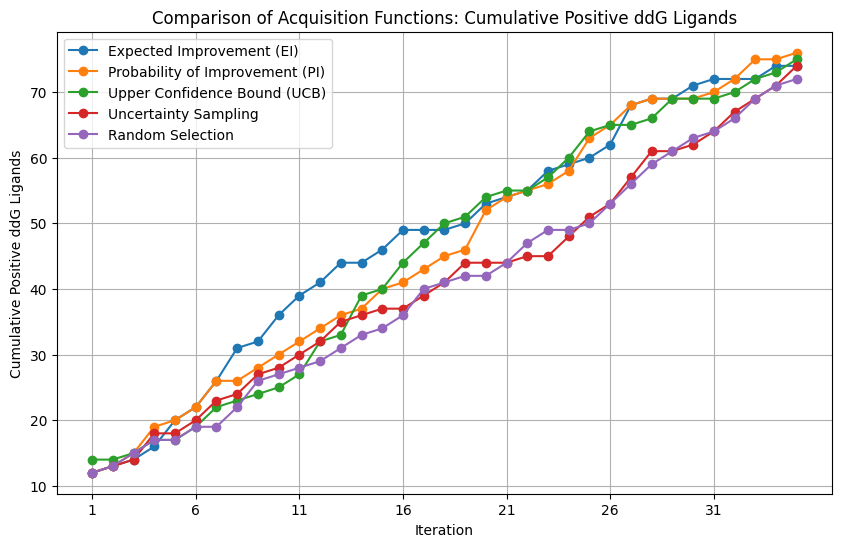

In [27]:
#### ADD MORE AQ FUNCTIONS WITH LATIN HYPERCUB SAMPLING (LHS)
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
import matplotlib.pyplot as plt
from pyDOE2 import lhs  # Import the LHS function

# Load your dataset
data = pd.read_csv("final_dataset.csv")  # Replace with your file path

# Step 1: Initialize the labeled and unlabeled sets using Latin Hypercube Sampling (LHS)
np.random.seed(42)  # For reproducibility

# Extract the three coordinates (columns 2, 3, and 4)
coordinates = data.iloc[:, 1:4].values  # Columns 2, 3, and 4 (0-based indexing)

# Generate 50 LHS samples in 3D space (normalized to [0, 1])
n_samples = 50
lhs_samples = lhs(3, samples=n_samples, criterion="maximin")  # 3 dimensions, 50 samples

# Scale the LHS samples to the range of the actual coordinates
min_coords = coordinates.min(axis=0)
max_coords = coordinates.max(axis=0)
scaled_lhs_samples = min_coords + lhs_samples * (max_coords - min_coords)

# Find the closest points in the dataset to the LHS samples
from scipy.spatial.distance import cdist

# Compute pairwise distances between LHS samples and dataset points
distances = cdist(scaled_lhs_samples, coordinates)

# Select the indices of the closest points
initial_indices = np.argmin(distances, axis=1)

# Ensure unique indices (in case multiple LHS samples map to the same closest point)
initial_indices = np.unique(initial_indices)

# If fewer than 50 unique points are selected, sample the remaining points randomly
if len(initial_indices) < n_samples:
    remaining_indices = np.setdiff1d(data.index, initial_indices)
    additional_indices = np.random.choice(remaining_indices, size=n_samples - len(initial_indices), replace=False)
    initial_indices = np.concatenate([initial_indices, additional_indices])

labeled_data_ei = data.loc[initial_indices].copy()  # Labeled dataset for EI
labeled_data_pi = labeled_data_ei.copy()  # Labeled dataset for PI
labeled_data_ucb = labeled_data_ei.copy()  # Labeled dataset for UCB
labeled_data_uncertainty = labeled_data_ei.copy()  # Labeled dataset for uncertainty sampling
labeled_data_random = labeled_data_ei.copy()  # Labeled dataset for random selection
unlabeled_data_ei = data.drop(initial_indices).copy()  # Unlabeled pool for EI
unlabeled_data_pi = unlabeled_data_ei.copy()  # Unlabeled pool for PI
unlabeled_data_ucb = unlabeled_data_ei.copy()  # Unlabeled pool for UCB
unlabeled_data_uncertainty = unlabeled_data_ei.copy()  # Unlabeled pool for uncertainty sampling
unlabeled_data_random = unlabeled_data_ei.copy()  # Unlabeled pool for random selection

# Step 2: Active learning loop
num_iterations = 35  # Number of iterations
candidates_per_iteration = 10  # Number of candidates to select per iteration

# Track cumulative positive ddG values for all approaches
positive_ddG_counts_ei = []  # For EI
positive_ddG_counts_pi = []  # For PI
positive_ddG_counts_ucb = []  # For UCB
positive_ddG_counts_uncertainty = []  # For uncertainty sampling
positive_ddG_counts_random = []  # For random selection

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")

    # --- Expected Improvement (EI) ---
    # Step 3: Train a regression model on the labeled data
    X_labeled_ei = labeled_data_ei[["coord1", "coord2", "coord3"]]
    y_labeled_ei = labeled_data_ei["ddG"]
    model_ei = RandomForestRegressor(random_state=42)
    model_ei.fit(X_labeled_ei, y_labeled_ei)

    # Step 4: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_ei = unlabeled_data_ei[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_ei = model_ei.predict(X_unlabeled_ei)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_ei = np.array([tree.predict(X_unlabeled_ei) for tree in model_ei.estimators_])
    y_std_unlabeled_ei = np.std(tree_predictions_ei, axis=0)

    # Step 5: Define the acquisition function (Expected Improvement)
    def expected_improvement(y_pred, y_std, best_y):
        """
        Calculate the Expected Improvement (EI) acquisition function.
        """
        improvement = y_pred - best_y
        z = improvement / (y_std + 1e-9)
        ei = improvement * norm.cdf(z) + y_std * norm.pdf(z)
        return ei

    # Calculate EI for all unlabeled samples
    best_y_ei = y_labeled_ei.max()  # Best observed ddG value so far
    ei_values = expected_improvement(y_pred_unlabeled_ei, y_std_unlabeled_ei, best_y_ei)

    # Step 6: Select the next best candidates (ligands with the highest EI values)
    top_candidate_indices_ei = np.argsort(ei_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_ei = unlabeled_data_ei.iloc[top_candidate_indices_ei].copy()  # Get the top candidates

    # Step 7: Simulate labeling by revealing the true ddG values
    labeled_data_ei = pd.concat([labeled_data_ei, top_candidates_ei])  # Add top candidates to the labeled set
    unlabeled_data_ei = unlabeled_data_ei.drop(top_candidates_ei.index)  # Remove top candidates from the unlabeled pool

    # Step 8: Track the cumulative number of positive ddG values
    positive_ddG_count_ei = (labeled_data_ei["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_ei.append(positive_ddG_count_ei)

    # --- Probability of Improvement (PI) ---
    # Step 9: Train a regression model on the labeled data
    X_labeled_pi = labeled_data_pi[["coord1", "coord2", "coord3"]]
    y_labeled_pi = labeled_data_pi["ddG"]
    model_pi = RandomForestRegressor(random_state=42)
    model_pi.fit(X_labeled_pi, y_labeled_pi)

    # Step 10: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_pi = unlabeled_data_pi[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_pi = model_pi.predict(X_unlabeled_pi)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_pi = np.array([tree.predict(X_unlabeled_pi) for tree in model_pi.estimators_])
    y_std_unlabeled_pi = np.std(tree_predictions_pi, axis=0)

    # Step 11: Define the acquisition function (Probability of Improvement)
    def probability_of_improvement(y_pred, y_std, best_y, xi=0.01):
        """
        Calculate the Probability of Improvement (PI) acquisition function.
        """
        z = (y_pred - best_y - xi) / (y_std + 1e-9)
        pi = norm.cdf(z)
        return pi

    # Calculate PI for all unlabeled samples
    best_y_pi = y_labeled_pi.max()  # Best observed ddG value so far
    pi_values = probability_of_improvement(y_pred_unlabeled_pi, y_std_unlabeled_pi, best_y_pi)

    # Step 12: Select the next best candidates (ligands with the highest PI values)
    top_candidate_indices_pi = np.argsort(pi_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_pi = unlabeled_data_pi.iloc[top_candidate_indices_pi].copy()  # Get the top candidates

    # Step 13: Simulate labeling by revealing the true ddG values
    labeled_data_pi = pd.concat([labeled_data_pi, top_candidates_pi])  # Add top candidates to the labeled set
    unlabeled_data_pi = unlabeled_data_pi.drop(top_candidates_pi.index)  # Remove top candidates from the unlabeled pool

    # Step 14: Track the cumulative number of positive ddG values
    positive_ddG_count_pi = (labeled_data_pi["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_pi.append(positive_ddG_count_pi)

    # --- Upper Confidence Bound (UCB) ---
    # Step 15: Train a regression model on the labeled data
    X_labeled_ucb = labeled_data_ucb[["coord1", "coord2", "coord3"]]
    y_labeled_ucb = labeled_data_ucb["ddG"]
    model_ucb = RandomForestRegressor(random_state=42)
    model_ucb.fit(X_labeled_ucb, y_labeled_ucb)

    # Step 16: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_ucb = unlabeled_data_ucb[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_ucb = model_ucb.predict(X_unlabeled_ucb)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_ucb = np.array([tree.predict(X_unlabeled_ucb) for tree in model_ucb.estimators_])
    y_std_unlabeled_ucb = np.std(tree_predictions_ucb, axis=0)

    # Step 17: Define the acquisition function (Upper Confidence Bound)
    def upper_confidence_bound(y_pred, y_std, kappa=1.0):
        """
        Calculate the Upper Confidence Bound (UCB) acquisition function.
        """
        ucb = y_pred + kappa * y_std
        return ucb

    # Calculate UCB for all unlabeled samples
    ucb_values = upper_confidence_bound(y_pred_unlabeled_ucb, y_std_unlabeled_ucb)

    # Step 18: Select the next best candidates (ligands with the highest UCB values)
    top_candidate_indices_ucb = np.argsort(ucb_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_ucb = unlabeled_data_ucb.iloc[top_candidate_indices_ucb].copy()  # Get the top candidates

    # Step 19: Simulate labeling by revealing the true ddG values
    labeled_data_ucb = pd.concat([labeled_data_ucb, top_candidates_ucb])  # Add top candidates to the labeled set
    unlabeled_data_ucb = unlabeled_data_ucb.drop(top_candidates_ucb.index)  # Remove top candidates from the unlabeled pool

    # Step 20: Track the cumulative number of positive ddG values
    positive_ddG_count_ucb = (labeled_data_ucb["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_ucb.append(positive_ddG_count_ucb)

    # --- Uncertainty Sampling ---
    # Step 21: Train a regression model on the labeled data
    X_labeled_uncertainty = labeled_data_uncertainty[["coord1", "coord2", "coord3"]]
    y_labeled_uncertainty = labeled_data_uncertainty["ddG"]
    model_uncertainty = RandomForestRegressor(random_state=42)
    model_uncertainty.fit(X_labeled_uncertainty, y_labeled_uncertainty)

    # Step 22: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_uncertainty = unlabeled_data_uncertainty[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_uncertainty = model_uncertainty.predict(X_unlabeled_uncertainty)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_uncertainty = np.array([tree.predict(X_unlabeled_uncertainty) for tree in model_uncertainty.estimators_])
    y_std_unlabeled_uncertainty = np.std(tree_predictions_uncertainty, axis=0)

    # Step 23: Select the next best candidates (ligands with the highest uncertainty)
    top_candidate_indices_uncertainty = np.argsort(y_std_unlabeled_uncertainty)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_uncertainty = unlabeled_data_uncertainty.iloc[top_candidate_indices_uncertainty].copy()  # Get the top candidates

    # Step 24: Simulate labeling by revealing the true ddG values
    labeled_data_uncertainty = pd.concat([labeled_data_uncertainty, top_candidates_uncertainty])  # Add top candidates to the labeled set
    unlabeled_data_uncertainty = unlabeled_data_uncertainty.drop(top_candidates_uncertainty.index)  # Remove top candidates from the unlabeled pool

    # Step 25: Track the cumulative number of positive ddG values
    positive_ddG_count_uncertainty = (labeled_data_uncertainty["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_uncertainty.append(positive_ddG_count_uncertainty)

    # --- Random Selection ---
    # Step 26: Randomly select candidates from the unlabeled pool
    random_candidate_indices = np.random.choice(unlabeled_data_random.index, size=candidates_per_iteration, replace=False)
    random_candidates = unlabeled_data_random.loc[random_candidate_indices].copy()  # Get the random candidates

    # Step 27: Simulate labeling by revealing the true ddG values
    labeled_data_random = pd.concat([labeled_data_random, random_candidates])  # Add random candidates to the labeled set
    unlabeled_data_random = unlabeled_data_random.drop(random_candidate_indices)  # Remove random candidates from the unlabeled pool

    # Step 28: Track the cumulative number of positive ddG values
    positive_ddG_count_random = (labeled_data_random["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_random.append(positive_ddG_count_random)

    # Print results for the current iteration
    print(f"EI - Cumulative positive ddG values: {positive_ddG_count_ei}")
    print(f"PI - Cumulative positive ddG values: {positive_ddG_count_pi}")
    print(f"UCB - Cumulative positive ddG values: {positive_ddG_count_ucb}")
    print(f"Uncertainty Sampling - Cumulative positive ddG values: {positive_ddG_count_uncertainty}")
    print(f"Random Selection - Cumulative positive ddG values: {positive_ddG_count_random}")

# Step 29: Plot the cumulative positive ddG values over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_ei, marker="o", label="Expected Improvement (EI)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_pi, marker="o", label="Probability of Improvement (PI)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_ucb, marker="o", label="Upper Confidence Bound (UCB)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_uncertainty, marker="o", label="Uncertainty Sampling")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_random, marker="o", label="Random Selection")

# Set x-ticks to show values at every two steps
plt.xticks(range(1, num_iterations + 1, 5))  # Show x-ticks at every two steps

plt.xlabel("Iteration")
plt.ylabel("Cumulative Positive ddG Ligands")
plt.title("Comparison of Acquisition Functions: Cumulative Positive ddG Ligands")
plt.legend()
plt.grid()

# Save the plot as a high-resolution figure
plt.savefig("RF_LHS_Num_Hit.png", dpi=300, bbox_inches="tight")

plt.show()



Iteration 1/35
EI - Cumulative positive ddG values: 14
PI - Cumulative positive ddG values: 14
UCB - Cumulative positive ddG values: 12
Uncertainty Sampling - Cumulative positive ddG values: 13
Random Selection - Cumulative positive ddG values: 11
Iteration 2/35
EI - Cumulative positive ddG values: 17
PI - Cumulative positive ddG values: 19
UCB - Cumulative positive ddG values: 16
Uncertainty Sampling - Cumulative positive ddG values: 14
Random Selection - Cumulative positive ddG values: 14
Iteration 3/35
EI - Cumulative positive ddG values: 18
PI - Cumulative positive ddG values: 23
UCB - Cumulative positive ddG values: 23
Uncertainty Sampling - Cumulative positive ddG values: 16
Random Selection - Cumulative positive ddG values: 15
Iteration 4/35
EI - Cumulative positive ddG values: 22
PI - Cumulative positive ddG values: 26
UCB - Cumulative positive ddG values: 25
Uncertainty Sampling - Cumulative positive ddG values: 16
Random Selection - Cumulative positive ddG values: 17
Iteratio

EI - Cumulative positive ddG values: 76
PI - Cumulative positive ddG values: 76
UCB - Cumulative positive ddG values: 76
Uncertainty Sampling - Cumulative positive ddG values: 76
Random Selection - Cumulative positive ddG values: 72
Iteration 35/35
EI - Cumulative positive ddG values: 76
PI - Cumulative positive ddG values: 76
UCB - Cumulative positive ddG values: 76
Uncertainty Sampling - Cumulative positive ddG values: 76
Random Selection - Cumulative positive ddG values: 73


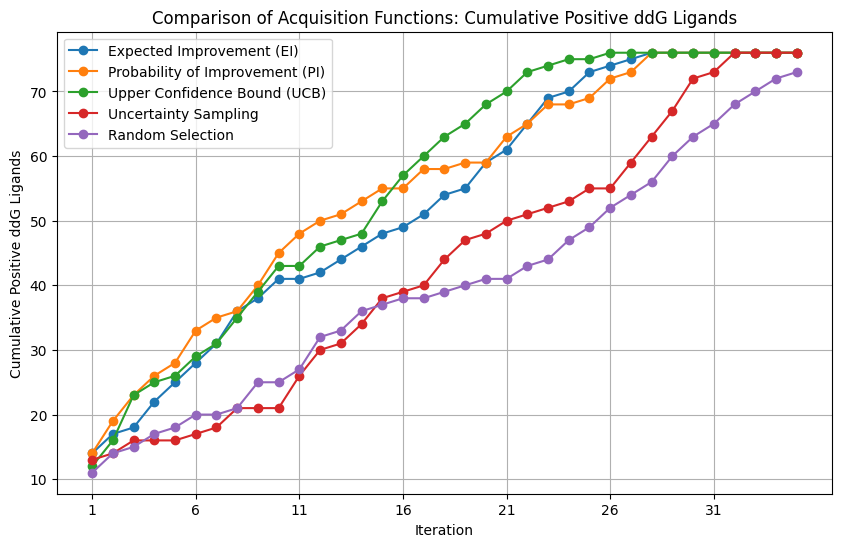

In [28]:
#### ADD MORE AQ FUNCTIONS WITH RANDOM SELECTION
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("final_dataset_BeadType.csv")  # Replace with your file path

# Step 1: Initialize the labeled and unlabeled sets
np.random.seed(42)  # For reproducibility
initial_indices = np.random.choice(data.index, size=50, replace=False)  # Randomly select 50 ligands
labeled_data_ei = data.loc[initial_indices].copy()  # Labeled dataset for EI
labeled_data_pi = labeled_data_ei.copy()  # Labeled dataset for PI
labeled_data_ucb = labeled_data_ei.copy()  # Labeled dataset for UCB
labeled_data_uncertainty = labeled_data_ei.copy()  # Labeled dataset for uncertainty sampling
labeled_data_random = labeled_data_ei.copy()  # Labeled dataset for random selection
unlabeled_data_ei = data.drop(initial_indices).copy()  # Unlabeled pool for EI
unlabeled_data_pi = unlabeled_data_ei.copy()  # Unlabeled pool for PI
unlabeled_data_ucb = unlabeled_data_ei.copy()  # Unlabeled pool for UCB
unlabeled_data_uncertainty = unlabeled_data_ei.copy()  # Unlabeled pool for uncertainty sampling
unlabeled_data_random = unlabeled_data_ei.copy()  # Unlabeled pool for random selection

# Step 2: Active learning loop
num_iterations = 35  # Number of iterations
candidates_per_iteration = 10  # Number of candidates to select per iteration

# Track cumulative positive ddG values for all approaches
positive_ddG_counts_ei = []  # For EI
positive_ddG_counts_pi = []  # For PI
positive_ddG_counts_ucb = []  # For UCB
positive_ddG_counts_uncertainty = []  # For uncertainty sampling
positive_ddG_counts_random = []  # For random selection

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")

    # --- Expected Improvement (EI) ---
    # Step 3: Train a regression model on the labeled data
    X_labeled_ei = labeled_data_ei[["coord1", "coord2", "coord3"]]
    y_labeled_ei = labeled_data_ei["ddG"]
    model_ei = RandomForestRegressor(random_state=42)
    model_ei.fit(X_labeled_ei, y_labeled_ei)

    # Step 4: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_ei = unlabeled_data_ei[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_ei = model_ei.predict(X_unlabeled_ei)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_ei = np.array([tree.predict(X_unlabeled_ei) for tree in model_ei.estimators_])
    y_std_unlabeled_ei = np.std(tree_predictions_ei, axis=0)

    # Step 5: Define the acquisition function (Expected Improvement)
    def expected_improvement(y_pred, y_std, best_y):
        """
        Calculate the Expected Improvement (EI) acquisition function.
        """
        improvement = y_pred - best_y
        z = improvement / (y_std + 1e-9)
        ei = improvement * norm.cdf(z) + y_std * norm.pdf(z)
        return ei

    # Calculate EI for all unlabeled samples
    best_y_ei = y_labeled_ei.max()  # Best observed ddG value so far
    ei_values = expected_improvement(y_pred_unlabeled_ei, y_std_unlabeled_ei, best_y_ei)

    # Step 6: Select the next best candidates (ligands with the highest EI values)
    top_candidate_indices_ei = np.argsort(ei_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_ei = unlabeled_data_ei.iloc[top_candidate_indices_ei].copy()  # Get the top candidates

    # Step 7: Simulate labeling by revealing the true ddG values
    labeled_data_ei = pd.concat([labeled_data_ei, top_candidates_ei])  # Add top candidates to the labeled set
    unlabeled_data_ei = unlabeled_data_ei.drop(top_candidates_ei.index)  # Remove top candidates from the unlabeled pool

    # Step 8: Track the cumulative number of positive ddG values
    positive_ddG_count_ei = (labeled_data_ei["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_ei.append(positive_ddG_count_ei)

    # --- Probability of Improvement (PI) ---
    # Step 9: Train a regression model on the labeled data
    X_labeled_pi = labeled_data_pi[["coord1", "coord2", "coord3"]]
    y_labeled_pi = labeled_data_pi["ddG"]
    model_pi = RandomForestRegressor(random_state=42)
    model_pi.fit(X_labeled_pi, y_labeled_pi)

    # Step 10: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_pi = unlabeled_data_pi[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_pi = model_pi.predict(X_unlabeled_pi)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_pi = np.array([tree.predict(X_unlabeled_pi) for tree in model_pi.estimators_])
    y_std_unlabeled_pi = np.std(tree_predictions_pi, axis=0)

    # Step 11: Define the acquisition function (Probability of Improvement)
    def probability_of_improvement(y_pred, y_std, best_y, xi=0.01):
        """
        Calculate the Probability of Improvement (PI) acquisition function.
        """
        z = (y_pred - best_y - xi) / (y_std + 1e-9)
        pi = norm.cdf(z)
        return pi

    # Calculate PI for all unlabeled samples
    best_y_pi = y_labeled_pi.max()  # Best observed ddG value so far
    pi_values = probability_of_improvement(y_pred_unlabeled_pi, y_std_unlabeled_pi, best_y_pi)

    # Step 12: Select the next best candidates (ligands with the highest PI values)
    top_candidate_indices_pi = np.argsort(pi_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_pi = unlabeled_data_pi.iloc[top_candidate_indices_pi].copy()  # Get the top candidates

    # Step 13: Simulate labeling by revealing the true ddG values
    labeled_data_pi = pd.concat([labeled_data_pi, top_candidates_pi])  # Add top candidates to the labeled set
    unlabeled_data_pi = unlabeled_data_pi.drop(top_candidates_pi.index)  # Remove top candidates from the unlabeled pool

    # Step 14: Track the cumulative number of positive ddG values
    positive_ddG_count_pi = (labeled_data_pi["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_pi.append(positive_ddG_count_pi)

    # --- Upper Confidence Bound (UCB) ---
    # Step 15: Train a regression model on the labeled data
    X_labeled_ucb = labeled_data_ucb[["coord1", "coord2", "coord3"]]
    y_labeled_ucb = labeled_data_ucb["ddG"]
    model_ucb = RandomForestRegressor(random_state=42)
    model_ucb.fit(X_labeled_ucb, y_labeled_ucb)

    # Step 16: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_ucb = unlabeled_data_ucb[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_ucb = model_ucb.predict(X_unlabeled_ucb)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_ucb = np.array([tree.predict(X_unlabeled_ucb) for tree in model_ucb.estimators_])
    y_std_unlabeled_ucb = np.std(tree_predictions_ucb, axis=0)

    # Step 17: Define the acquisition function (Upper Confidence Bound)
    def upper_confidence_bound(y_pred, y_std, kappa=1.0):
        """
        Calculate the Upper Confidence Bound (UCB) acquisition function.
        """
        ucb = y_pred + kappa * y_std
        return ucb

    # Calculate UCB for all unlabeled samples
    ucb_values = upper_confidence_bound(y_pred_unlabeled_ucb, y_std_unlabeled_ucb)

    # Step 18: Select the next best candidates (ligands with the highest UCB values)
    top_candidate_indices_ucb = np.argsort(ucb_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_ucb = unlabeled_data_ucb.iloc[top_candidate_indices_ucb].copy()  # Get the top candidates

    # Step 19: Simulate labeling by revealing the true ddG values
    labeled_data_ucb = pd.concat([labeled_data_ucb, top_candidates_ucb])  # Add top candidates to the labeled set
    unlabeled_data_ucb = unlabeled_data_ucb.drop(top_candidates_ucb.index)  # Remove top candidates from the unlabeled pool

    # Step 20: Track the cumulative number of positive ddG values
    positive_ddG_count_ucb = (labeled_data_ucb["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_ucb.append(positive_ddG_count_ucb)

    # --- Uncertainty Sampling ---
    # Step 21: Train a regression model on the labeled data
    X_labeled_uncertainty = labeled_data_uncertainty[["coord1", "coord2", "coord3"]]
    y_labeled_uncertainty = labeled_data_uncertainty["ddG"]
    model_uncertainty = RandomForestRegressor(random_state=42)
    model_uncertainty.fit(X_labeled_uncertainty, y_labeled_uncertainty)

    # Step 22: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_uncertainty = unlabeled_data_uncertainty[["coord1", "coord2", "coord3"]]
    y_pred_unlabeled_uncertainty = model_uncertainty.predict(X_unlabeled_uncertainty)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    tree_predictions_uncertainty = np.array([tree.predict(X_unlabeled_uncertainty) for tree in model_uncertainty.estimators_])
    y_std_unlabeled_uncertainty = np.std(tree_predictions_uncertainty, axis=0)

    # Step 23: Select the next best candidates (ligands with the highest uncertainty)
    top_candidate_indices_uncertainty = np.argsort(y_std_unlabeled_uncertainty)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_uncertainty = unlabeled_data_uncertainty.iloc[top_candidate_indices_uncertainty].copy()  # Get the top candidates

    # Step 24: Simulate labeling by revealing the true ddG values
    labeled_data_uncertainty = pd.concat([labeled_data_uncertainty, top_candidates_uncertainty])  # Add top candidates to the labeled set
    unlabeled_data_uncertainty = unlabeled_data_uncertainty.drop(top_candidates_uncertainty.index)  # Remove top candidates from the unlabeled pool

    # Step 25: Track the cumulative number of positive ddG values
    positive_ddG_count_uncertainty = (labeled_data_uncertainty["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_uncertainty.append(positive_ddG_count_uncertainty)

    # --- Random Selection ---
    # Step 26: Randomly select candidates from the unlabeled pool
    random_candidate_indices = np.random.choice(unlabeled_data_random.index, size=candidates_per_iteration, replace=False)
    random_candidates = unlabeled_data_random.loc[random_candidate_indices].copy()  # Get the random candidates

    # Step 27: Simulate labeling by revealing the true ddG values
    labeled_data_random = pd.concat([labeled_data_random, random_candidates])  # Add random candidates to the labeled set
    unlabeled_data_random = unlabeled_data_random.drop(random_candidate_indices)  # Remove random candidates from the unlabeled pool

    # Step 28: Track the cumulative number of positive ddG values
    positive_ddG_count_random = (labeled_data_random["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_random.append(positive_ddG_count_random)

    # Print results for the current iteration
    print(f"EI - Cumulative positive ddG values: {positive_ddG_count_ei}")
    print(f"PI - Cumulative positive ddG values: {positive_ddG_count_pi}")
    print(f"UCB - Cumulative positive ddG values: {positive_ddG_count_ucb}")
    print(f"Uncertainty Sampling - Cumulative positive ddG values: {positive_ddG_count_uncertainty}")
    print(f"Random Selection - Cumulative positive ddG values: {positive_ddG_count_random}")

# Step 29: Plot the cumulative positive ddG values over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_ei, marker="o", label="Expected Improvement (EI)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_pi, marker="o", label="Probability of Improvement (PI)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_ucb, marker="o", label="Upper Confidence Bound (UCB)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_uncertainty, marker="o", label="Uncertainty Sampling")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_random, marker="o", label="Random Selection")

# Set x-ticks to show values at every two steps
plt.xticks(range(1, num_iterations + 1, 5))  # Show x-ticks at every two steps

plt.xlabel("Iteration")
plt.ylabel("Cumulative Positive ddG Ligands")
plt.title("Comparison of Acquisition Functions: Cumulative Positive ddG Ligands")
plt.legend()
plt.grid()

# Save the plot as a high-resolution figure
plt.savefig("RF_Num_Hit.png", dpi=300, bbox_inches="tight")

plt.show()

## GPR

Iteration 1/35
EI - Cumulative positive ddG values: 15
PI - Cumulative positive ddG values: 15
UCB - Cumulative positive ddG values: 14
Uncertainty Sampling - Cumulative positive ddG values: 14
Random Selection - Cumulative positive ddG values: 11
Iteration 2/35
EI - Cumulative positive ddG values: 17
PI - Cumulative positive ddG values: 15
UCB - Cumulative positive ddG values: 16
Uncertainty Sampling - Cumulative positive ddG values: 14
Random Selection - Cumulative positive ddG values: 14
Iteration 3/35
EI - Cumulative positive ddG values: 17
PI - Cumulative positive ddG values: 17
UCB - Cumulative positive ddG values: 19
Uncertainty Sampling - Cumulative positive ddG values: 14
Random Selection - Cumulative positive ddG values: 15
Iteration 4/35
EI - Cumulative positive ddG values: 19
PI - Cumulative positive ddG values: 21
UCB - Cumulative positive ddG values: 21
Uncertainty Sampling - Cumulative positive ddG values: 17
Random Selection - Cumulative positive ddG values: 17
Iteratio

EI - Cumulative positive ddG values: 74
PI - Cumulative positive ddG values: 74
UCB - Cumulative positive ddG values: 75
Uncertainty Sampling - Cumulative positive ddG values: 72
Random Selection - Cumulative positive ddG values: 72
Iteration 35/35
EI - Cumulative positive ddG values: 75
PI - Cumulative positive ddG values: 75
UCB - Cumulative positive ddG values: 75
Uncertainty Sampling - Cumulative positive ddG values: 73
Random Selection - Cumulative positive ddG values: 73


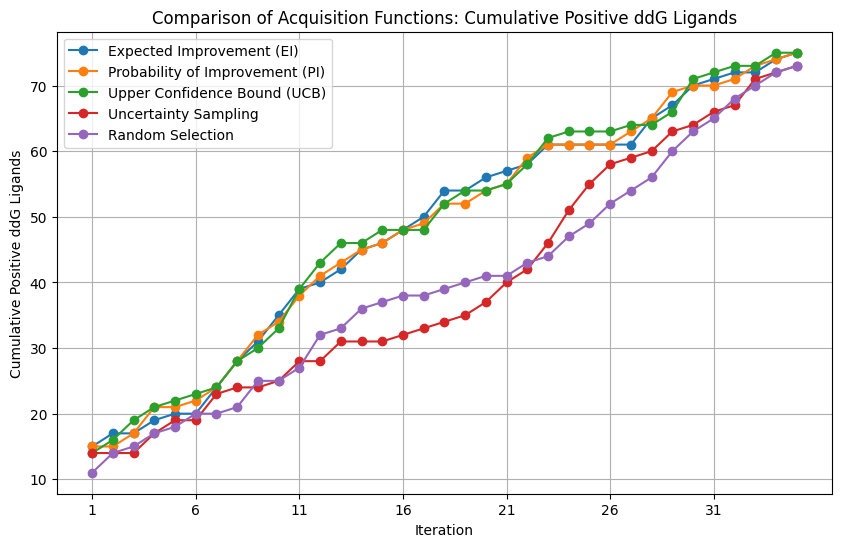

In [7]:
#### ADD MORE AQ FUNCTIONS
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("final_dataset_BeadType.csv")  # Replace with your file path

# Step 1: Initialize the labeled and unlabeled sets
np.random.seed(42)  # For reproducibility
initial_indices = np.random.choice(data.index, size=50, replace=False)  # Randomly select 50 ligands
labeled_data_ei = data.loc[initial_indices].copy()  # Labeled dataset for EI
labeled_data_pi = labeled_data_ei.copy()  # Labeled dataset for PI
labeled_data_ucb = labeled_data_ei.copy()  # Labeled dataset for UCB
labeled_data_uncertainty = labeled_data_ei.copy()  # Labeled dataset for uncertainty sampling
labeled_data_random = labeled_data_ei.copy()  # Labeled dataset for random selection
unlabeled_data_ei = data.drop(initial_indices).copy()  # Unlabeled pool for EI
unlabeled_data_pi = unlabeled_data_ei.copy()  # Unlabeled pool for PI
unlabeled_data_ucb = unlabeled_data_ei.copy()  # Unlabeled pool for UCB
unlabeled_data_uncertainty = unlabeled_data_ei.copy()  # Unlabeled pool for uncertainty sampling
unlabeled_data_random = unlabeled_data_ei.copy()  # Unlabeled pool for random selection

# Step 2: Active learning loop
num_iterations = 35  # Number of iterations
candidates_per_iteration = 10  # Number of candidates to select per iteration

# Track cumulative positive ddG values for all approaches
positive_ddG_counts_ei = []  # For EI
positive_ddG_counts_pi = []  # For PI
positive_ddG_counts_ucb = []  # For UCB
positive_ddG_counts_uncertainty = []  # For uncertainty sampling
positive_ddG_counts_random = []  # For random selection

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")

    # --- Expected Improvement (EI) ---
    # Step 3: Train a regression model on the labeled data
    X_labeled_ei = labeled_data_ei[["coord1", "coord2", "coord3"]]
    y_labeled_ei = labeled_data_ei["ddG"]
    kernel = C(1.0) * RBF(length_scale=1.0)
    model_ei = GaussianProcessRegressor(kernel=kernel, alpha=1e-6)
    model_ei.fit(X_labeled_ei, y_labeled_ei)

    # Step 4: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_ei = unlabeled_data_ei[["coord1", "coord2", "coord3"]]
    #y_pred_unlabeled_ei = model_ei.predict(X_unlabeled_ei)
    y_pred_unlabeled_ei, y_std_unlabeled_ei = model_ei.predict(X_unlabeled_ei, return_std=True)
    
    # Estimate uncertainty using the standard deviation of predictions from individual trees
    #tree_predictions_ei = np.array([tree.predict(X_unlabeled_ei) for tree in model_ei.estimators_])
    #y_std_unlabeled_ei = np.std(tree_predictions_ei, axis=0)

    # Step 5: Define the acquisition function (Expected Improvement)
    def expected_improvement(y_pred, y_std, best_y):
        """
        Calculate the Expected Improvement (EI) acquisition function.
        """
        improvement = y_pred - best_y
        z = improvement / (y_std + 1e-9)
        ei = improvement * norm.cdf(z) + y_std * norm.pdf(z)
        return ei

    # Calculate EI for all unlabeled samples
    best_y_ei = y_labeled_ei.max()  # Best observed ddG value so far
    ei_values = expected_improvement(y_pred_unlabeled_ei, y_std_unlabeled_ei, best_y_ei)

    # Step 6: Select the next best candidates (ligands with the highest EI values)
    top_candidate_indices_ei = np.argsort(ei_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_ei = unlabeled_data_ei.iloc[top_candidate_indices_ei].copy()  # Get the top candidates

    # Step 7: Simulate labeling by revealing the true ddG values
    labeled_data_ei = pd.concat([labeled_data_ei, top_candidates_ei])  # Add top candidates to the labeled set
    unlabeled_data_ei = unlabeled_data_ei.drop(top_candidates_ei.index)  # Remove top candidates from the unlabeled pool

    # Step 8: Track the cumulative number of positive ddG values
    positive_ddG_count_ei = (labeled_data_ei["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_ei.append(positive_ddG_count_ei)

    # --- Probability of Improvement (PI) ---
    # Step 9: Train a regression model on the labeled data
    X_labeled_pi = labeled_data_pi[["coord1", "coord2", "coord3"]]
    y_labeled_pi = labeled_data_pi["ddG"]
    kernel = C(1.0) * RBF(length_scale=1.0)
    model_pi = GaussianProcessRegressor(kernel=kernel, alpha=1e-6)
    model_pi.fit(X_labeled_pi, y_labeled_pi)

    # Step 10: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_pi = unlabeled_data_pi[["coord1", "coord2", "coord3"]]
    #y_pred_unlabeled_pi = model_pi.predict(X_unlabeled_pi)
    y_pred_unlabeled_pi, y_std_unlabeled_pi = model_pi.predict(X_unlabeled_pi, return_std=True)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    #tree_predictions_pi = np.array([tree.predict(X_unlabeled_pi) for tree in model_pi.estimators_])
    #y_std_unlabeled_pi = np.std(tree_predictions_pi, axis=0)

    # Step 11: Define the acquisition function (Probability of Improvement)
    def probability_of_improvement(y_pred, y_std, best_y, xi=0.01):
        """
        Calculate the Probability of Improvement (PI) acquisition function.
        """
        z = (y_pred - best_y - xi) / (y_std + 1e-9)
        pi = norm.cdf(z)
        return pi

    # Calculate PI for all unlabeled samples
    best_y_pi = y_labeled_pi.max()  # Best observed ddG value so far
    pi_values = probability_of_improvement(y_pred_unlabeled_pi, y_std_unlabeled_pi, best_y_pi)

    # Step 12: Select the next best candidates (ligands with the highest PI values)
    top_candidate_indices_pi = np.argsort(pi_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_pi = unlabeled_data_pi.iloc[top_candidate_indices_pi].copy()  # Get the top candidates

    # Step 13: Simulate labeling by revealing the true ddG values
    labeled_data_pi = pd.concat([labeled_data_pi, top_candidates_pi])  # Add top candidates to the labeled set
    unlabeled_data_pi = unlabeled_data_pi.drop(top_candidates_pi.index)  # Remove top candidates from the unlabeled pool

    # Step 14: Track the cumulative number of positive ddG values
    positive_ddG_count_pi = (labeled_data_pi["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_pi.append(positive_ddG_count_pi)

    # --- Upper Confidence Bound (UCB) ---
    # Step 15: Train a regression model on the labeled data
    X_labeled_ucb = labeled_data_ucb[["coord1", "coord2", "coord3"]]
    y_labeled_ucb = labeled_data_ucb["ddG"]
    kernel = C(1.0) * RBF(length_scale=1.0)
    model_ucb = GaussianProcessRegressor(kernel=kernel, alpha=1e-6)
    model_ucb.fit(X_labeled_ucb, y_labeled_ucb)

    # Step 16: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_ucb = unlabeled_data_ucb[["coord1", "coord2", "coord3"]]
    #y_pred_unlabeled_ucb = model_ucb.predict(X_unlabeled_ucb)
    y_pred_unlabeled_ucb, y_std_unlabeled_ucb = model_ucb.predict(X_unlabeled_ucb, return_std=True)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    #tree_predictions_ucb = np.array([tree.predict(X_unlabeled_ucb) for tree in model_ucb.estimators_])
    #y_std_unlabeled_ucb = np.std(tree_predictions_ucb, axis=0)

    # Step 17: Define the acquisition function (Upper Confidence Bound)
    def upper_confidence_bound(y_pred, y_std, kappa=1.0):
        """
        Calculate the Upper Confidence Bound (UCB) acquisition function.
        """
        ucb = y_pred + kappa * y_std
        return ucb

    # Calculate UCB for all unlabeled samples
    ucb_values = upper_confidence_bound(y_pred_unlabeled_ucb, y_std_unlabeled_ucb)

    # Step 18: Select the next best candidates (ligands with the highest UCB values)
    top_candidate_indices_ucb = np.argsort(ucb_values)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_ucb = unlabeled_data_ucb.iloc[top_candidate_indices_ucb].copy()  # Get the top candidates

    # Step 19: Simulate labeling by revealing the true ddG values
    labeled_data_ucb = pd.concat([labeled_data_ucb, top_candidates_ucb])  # Add top candidates to the labeled set
    unlabeled_data_ucb = unlabeled_data_ucb.drop(top_candidates_ucb.index)  # Remove top candidates from the unlabeled pool

    # Step 20: Track the cumulative number of positive ddG values
    positive_ddG_count_ucb = (labeled_data_ucb["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_ucb.append(positive_ddG_count_ucb)

    # --- Uncertainty Sampling ---
    # Step 21: Train a regression model on the labeled data
    X_labeled_uncertainty = labeled_data_uncertainty[["coord1", "coord2", "coord3"]]
    y_labeled_uncertainty = labeled_data_uncertainty["ddG"]
    kernel = C(1.0) * RBF(length_scale=1.0)
    model_uncertainty = GaussianProcessRegressor(kernel=kernel, alpha=1e-6)
    model_uncertainty.fit(X_labeled_uncertainty, y_labeled_uncertainty)

    # Step 22: Predict ddG values and uncertainty for the unlabeled data
    X_unlabeled_uncertainty = unlabeled_data_uncertainty[["coord1", "coord2", "coord3"]]
    #y_pred_unlabeled_uncertainty = model_uncertainty.predict(X_unlabeled_uncertainty)
    y_pred_unlabeled_uncertainty, y_std_unlabeled_uncertainty = model_uncertainty.predict(X_unlabeled_uncertainty, return_std=True)

    # Estimate uncertainty using the standard deviation of predictions from individual trees
    #tree_predictions_uncertainty = np.array([tree.predict(X_unlabeled_uncertainty) for tree in model_uncertainty.estimators_])
    #y_std_unlabeled_uncertainty = np.std(tree_predictions_uncertainty, axis=0)

    # Step 23: Select the next best candidates (ligands with the highest uncertainty)
    top_candidate_indices_uncertainty = np.argsort(y_std_unlabeled_uncertainty)[-candidates_per_iteration:]  # Indices of top candidates
    top_candidates_uncertainty = unlabeled_data_uncertainty.iloc[top_candidate_indices_uncertainty].copy()  # Get the top candidates

    # Step 24: Simulate labeling by revealing the true ddG values
    labeled_data_uncertainty = pd.concat([labeled_data_uncertainty, top_candidates_uncertainty])  # Add top candidates to the labeled set
    unlabeled_data_uncertainty = unlabeled_data_uncertainty.drop(top_candidates_uncertainty.index)  # Remove top candidates from the unlabeled pool

    # Step 25: Track the cumulative number of positive ddG values
    positive_ddG_count_uncertainty = (labeled_data_uncertainty["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_uncertainty.append(positive_ddG_count_uncertainty)

    # --- Random Selection ---
    # Step 26: Randomly select candidates from the unlabeled pool
    random_candidate_indices = np.random.choice(unlabeled_data_random.index, size=candidates_per_iteration, replace=False)
    random_candidates = unlabeled_data_random.loc[random_candidate_indices].copy()  # Get the random candidates

    # Step 27: Simulate labeling by revealing the true ddG values
    labeled_data_random = pd.concat([labeled_data_random, random_candidates])  # Add random candidates to the labeled set
    unlabeled_data_random = unlabeled_data_random.drop(random_candidate_indices)  # Remove random candidates from the unlabeled pool

    # Step 28: Track the cumulative number of positive ddG values
    positive_ddG_count_random = (labeled_data_random["ddG"] > 0).sum()  # Count positive ddG values
    positive_ddG_counts_random.append(positive_ddG_count_random)

    # Print results for the current iteration
    print(f"EI - Cumulative positive ddG values: {positive_ddG_count_ei}")
    print(f"PI - Cumulative positive ddG values: {positive_ddG_count_pi}")
    print(f"UCB - Cumulative positive ddG values: {positive_ddG_count_ucb}")
    print(f"Uncertainty Sampling - Cumulative positive ddG values: {positive_ddG_count_uncertainty}")
    print(f"Random Selection - Cumulative positive ddG values: {positive_ddG_count_random}")

# Step 29: Plot the cumulative positive ddG values over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_ei, marker="o", label="Expected Improvement (EI)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_pi, marker="o", label="Probability of Improvement (PI)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_ucb, marker="o", label="Upper Confidence Bound (UCB)")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_uncertainty, marker="o", label="Uncertainty Sampling")
plt.plot(range(1, num_iterations + 1), positive_ddG_counts_random, marker="o", label="Random Selection")

# Set x-ticks to show values at every two steps
plt.xticks(range(1, num_iterations + 1, 5))  # Show x-ticks at every two steps

plt.xlabel("Iteration")
plt.ylabel("Cumulative Positive ddG Ligands")
plt.title("Comparison of Acquisition Functions: Cumulative Positive ddG Ligands")
plt.legend()
plt.grid()

# Save the plot as a high-resolution figure
plt.savefig("GPR_Num_Hit.png", dpi=300, bbox_inches="tight")

plt.show()

## NEURAL NETWORKS